# KMeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

plt.style.use('fivethirtyeight')
plt.rc('font', size=8)

## Напишем свою реализацию KMeans

In [2]:
def euclidean(x, y):
    x, y = np.array(x), np.array(y)
    return np.sum((x - y)**2, axis=1) ** (1/2)

In [3]:
class KMeans:

    def __init__(self,
                 n_clusters=8,
                 max_iter=300,
                 tol=0.0001,
                 random_state=None) -> None:

        self._n_clusters = n_clusters
        self._max_iter = max_iter
        self._tol = tol
        self._random_state = random_state
        self._centroids = None
        self._histoty = []

    @property
    def history(self):
        return np.array(self._histoty)

    def fit(self, X, y=None):
        self._histoty = []
        X = np.array(X)
        if self._random_state is not None:
            np.random.seed(int(self._random_state))

        ids = np.arange(X.shape[0])
        self._centroids = X[np.random.choice(ids, self._n_clusters)]
        self._histoty.append(self._centroids.copy())

        for _ in range(self._max_iter):
            distances = np.apply_along_axis(self._get_distances, 1, X)
            closest = distances.argmin(axis=1)

            for centroid in range(self._n_clusters):
                if any(closest == centroid):
                    self._centroids[centroid] = np.mean(
                        X[closest == centroid], axis=0
                    )

            old_centroids = self._histoty[-1]
            self._histoty.append(self._centroids.copy())
            if max(euclidean(old_centroids, self._centroids)) < self._tol:
                break

        return self.history

    def _get_distances(self, X):
        return euclidean(X, self._centroids)

    def predict(self, X):
        distances = np.apply_along_axis(self._get_distances, 1, np.array(X))
        return distances.argmin(axis=1)

## Посмотрим как работает модель

In [4]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    plt.figure(figsize=(7,7))

    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='yellow')

    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item], alpha=0.7)

    plt.show()

### Загрузка данных

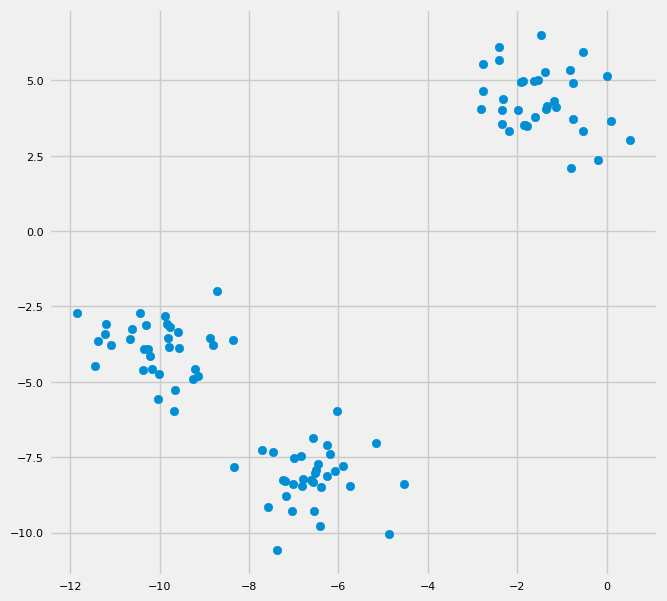

In [5]:
X, y = make_blobs(n_samples=100, random_state=1)

plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Работа модели

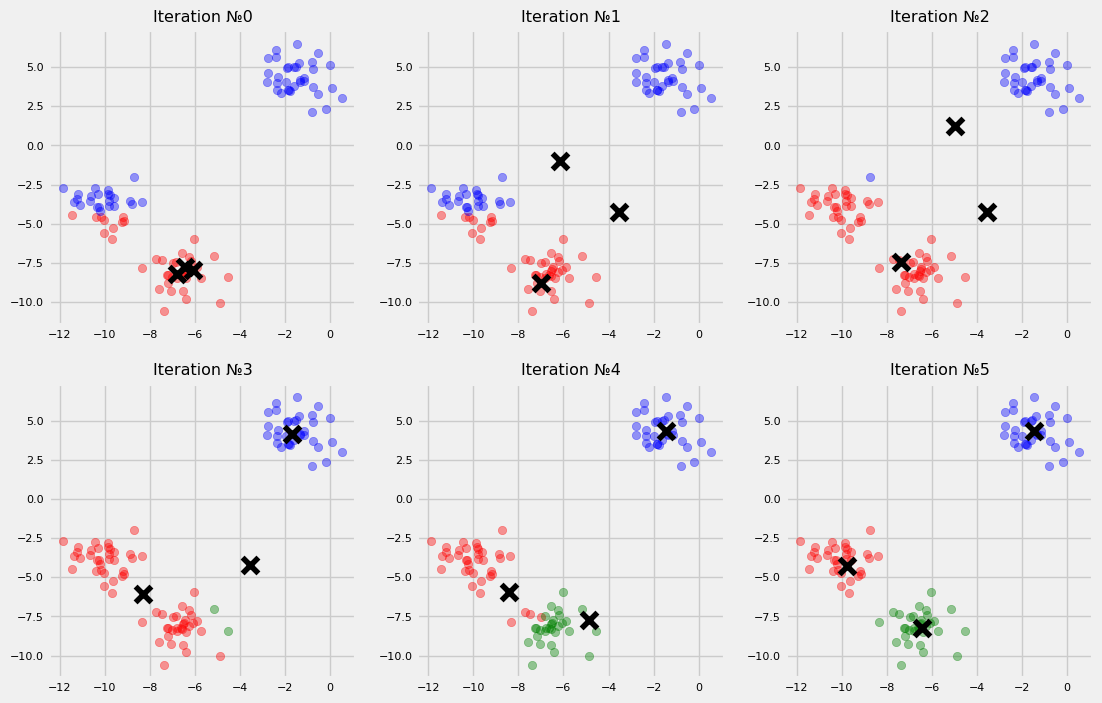

In [6]:
colors = ['r', 'g', 'b']
plt.figure(figsize=(12,8))

random_state = 2
for max_iter in range(1, 6, 1):
    kmeans = KMeans(n_clusters=3,
                    max_iter=max_iter,
                    random_state=random_state)

    history = kmeans.fit(X)
    classes = kmeans.predict(X)

    if max_iter == 1:
        plt.subplot(2, 3, 1)
        plt.title(f'Iteration №0')

        for cls in np.unique(classes):
            plt.scatter(X[classes==cls, 0],
                        X[classes==cls, 1], 
                        color=colors[cls], alpha=0.4)

        plt.scatter(history[0, :, 0],
                    history[0, :, 1],
                    marker='x', s=130, c='black')

    plt.subplot(2, 3, max_iter+1)
    plt.title(f'Iteration №{max_iter}')
    for cls in np.unique(classes):
        plt.scatter(X[classes==cls, 0],
                    X[classes==cls, 1],
                    color=colors[cls], alpha=0.4)

    plt.scatter(history[-1, :, 0],
                history[-1, :, 1],
                marker='x', s=130, c='black')

plt.show()

Это очень простая реализация kmeans, которая вбрасывает центройды в случайные позиции. При такой реализации центройды могут не разойтись. Если добавить возможность вбрасывать центройды в самые удалеённые точки относительно тех, которые уже проинициализированы, то можно значительно улучшить качество кластеризации.